# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline

from nnn.uv import *

# Data cleaning

In [2]:
# copy pasted from command center for convenience
# only one peak found by AnalyzePeaks
hplc_clean_seqid = ["WC68_stem_3p", "WC68_stem_5p", "WC1025_split_5p", \
"WC1025_split_3p", "WC1375_stem_5p", "WC1375_stem_3p", "DMM004_5p", \
"DMM004_3p", "DMM005_5p", "DMM005_3p", "DMM006_5p", "DMM007_5p", \
"DMM007_3p", "BC0", "BC1", "BC6", "BC7", "BC8", "BC9", "BC10", \
"BC11", "MMCNNN2328", "MMCNNN2331", "MMCNNN2334", "MMCNNN2335", \
"MMCNNN2336", "MMCNNN2337", "MMTM1325", "MMTM176", "MMTM178", \
"MMTM179", "MMTM181", "MMTM185", "MMTM189", "MMTM1917", "MMTM29", \
"MMTM397", "MMTM509", "MMTM877", "DMM003_3p_rc", "DMM004_3p_rc", \
"DMM005_3p_rc", "DMM006_3p_rc", "DMM007_3p_rc", "TETNN1003", \
"TETNN999", "TETNN963", "TETNN979", "TETNNN1696", "TETNNN2082", \
"TETNNN1570", "HP002", "HP003", "HP004", "HP005", "HP007", "HP008", \
"HP010", "HP011", "HP012", "HP014", "HP015", "HP016", "HP017", \
"HP018", "HP019", "HP021", "HP022", "HP023", "HP024"]

In [42]:
np.unique(result_df.SEQID)

array(['BC0', 'BNNN2110', 'BNNN3096', 'BNNN4291', 'BNNN8973', 'BNNN9183',
       'DMM003', 'HP001', 'HP003', 'HP005', 'HP007', 'HP008', 'HP009',
       'HP010', 'HP011', 'HP012', 'HP014', 'HP015', 'HP016', 'HP017',
       'HP018', 'HP019', 'HP020', 'HP021', 'HP022', 'HP023', 'HP024',
       'HP029', 'HP038', 'HP039', 'HP040', 'HP041', 'HP042', 'MMCNN112',
       'MMCNN124', 'MMCNN151', 'MMCNN164', 'MMCNN20', 'MMCNN70',
       'MMCNN88', 'MMCNNN2328', 'MMCNNN2336', 'MMCNNN2337', 'MMTM1325',
       'MMTM176', 'MMTM177', 'MMTM179', 'MMTM181', 'MMTM185', 'MMTM189',
       'MMTM1917', 'MMTM29', 'TETNN1007', 'TETNN1015', 'TETNN773',
       'TETNN839', 'TETNN975', 'TETNNN1262', 'TETNNN1390', 'TETNNN1511',
       'TETNNN1570', 'TETNNN1696', 'TETNNN1781', 'TETNNN1847',
       'TETNNN1848', 'TETNNN2099', 'TETNNN2108', 'TETNNN2229',
       'TETNNN2253', 'TETNNN2364', 'TETNNN3186', 'TETNNN3276',
       'TETNNN449', 'TETNNN615', 'TETNNN621', 'TETNNN707', 'TETNNN757',
       'TRINNN162', 'TRINNN445'


297 / 387 single curves passed QC




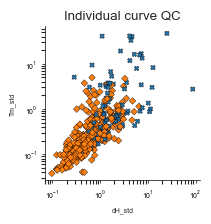

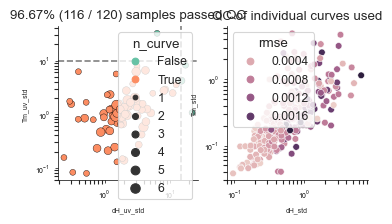

In [65]:
sample_sheet_file = './data/uv_melt/ECLTables/ECLSampleSheet230502.csv'
datadir="./data/uv_melt/ECLExportAuto"
result_file='./data/uv_melt/uvmelt_230502_2.csv'
agg_result_file='./data/uv_melt/uvmelt_agg_230907.csv'

result_df = pd.read_csv(result_file, index_col=0)
result_agg_df = agg_fit_result(uvmelt_result_file=result_file,
                               agg_result_file=agg_result_file,
                               single_curve_qc_criteria='rmse < 0.002 & dH_std < 10 & Tm_std < 5 & dH < 0 & dH > -100 & Tm > 0 & Tm < 120',
                               Tm_std_thresh=10, dH_std_thresh=15,
                               sample_sheet_file=sample_sheet_file, 
                               clean=True, only_use_cooling=False)
util.save_multi_image('./fig/Fig2/uv_qc.pdf')

In [101]:
### Accounting ###

n_seq = len(np.unique(result_agg_df.SEQID))
n_clean_seq = np.sum(result_agg_df.SEQID.isin(hplc_clean_seqid))
print(f'There are {n_seq} unique sequence variants in total, {n_clean_seq} are clean by HPLC.')

is_hp = result_agg_df.SEQID.apply(lambda x: x.startswith('HP'))
print(f'  - Of the {n_seq} variants, {np.sum(is_hp)} are de novo hairpins, and {n_seq - np.sum(is_hp)} are in the Array Melt library.')

is_hp = result_agg_df.SEQID[result_agg_df.SEQID.isin(hplc_clean_seqid)].apply(lambda x: x.startswith('HP'))
print(f'  - Of the {n_clean_seq} HPLC-clean variants, {np.sum(is_hp)} are de novo hairpins, and {n_clean_seq - np.sum(is_hp)} are in the Array Melt library.')

print(f'\nOf the {n_seq} variants:')
conc, counts = np.unique(result_agg_df.Na_mM, return_counts=True)
for Na_mM, count in zip(conc, counts):
    print(f'  - {count} samples were measured at {Na_mM} mM NaCl, 50 mM HEPES, pH8.0')
    
print(f'\nOf the {n_clean_seq} HPLC-clean variants:')
conc, counts = np.unique(result_agg_df[result_agg_df.SEQID.isin(hplc_clean_seqid)].Na_mM, return_counts=True)
for Na_mM, count in zip(conc, counts):
    print(f'  - {count} samples were measured at {Na_mM} mM NaCl, 50 mM HEPES, pH8.0')
    
_, counts = np.unique(result_agg_df.SEQID[result_agg_df.SEQID.isin(hplc_clean_seqid)].apply(lambda x: x.startswith('HP')), return_counts=True)
print(counts)

There are 85 unique sequence variants in total, 24 are clean by HPLC.
  - Of the 85 variants, 19 are de novo hairpins, and 66 are in the Array Melt library.
  - Of the 24 HPLC-clean variants, 12 are de novo hairpins, and 12 are in the Array Melt library.

Of the 85 variants:
  - 87 samples were measured at 25.0 mM NaCl, 50 mM HEPES, pH8.0
  - 7 samples were measured at 50.0 mM NaCl, 50 mM HEPES, pH8.0
  - 22 samples were measured at 1000.0 mM NaCl, 50 mM HEPES, pH8.0

Of the 24 HPLC-clean variants:
  - 24 samples were measured at 25.0 mM NaCl, 50 mM HEPES, pH8.0
[12 12]



297 / 387 single curves passed QC




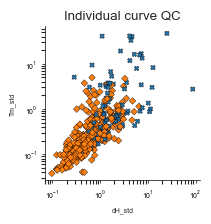

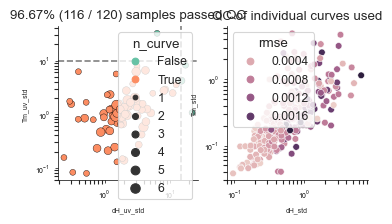

In [64]:
result_agg_df = result_agg_df[result_agg_df.SEQID.isin(hplc_clean_seqid)]

arr = pd.read_csv('./data/models/raw/arr_v0_n=30680.csv', index_col=0)
vf = result_agg_df.query('is_hairpin & Na_mM == 25').sort_values(by=['conc_uM', 'n_curve', 'curve_date']).drop_duplicates(keep='last').merge(arr, how='left', on='SEQID')



# Fig. 2b: Example UV melting curve

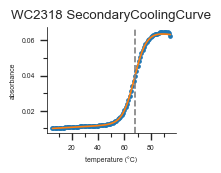

In [103]:
"""
for export
"""
df_2a = result_df.query('curve_date == 22071204 & curve_num == 7')
row = df_2a.iloc[0,:]
fn = row['data_file']
blanked_fn = get_blanked_fn(fn)
if os.path.isfile(blanked_fn):
    fn = blanked_fn
curve = read_curve(fn)
curve_predict = curve_model(curve.celsius, **{x:row[x] for x in ['dH','Tm','fmax','fmin','s1', 's2']})

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))

row = df_2a.iloc[2,:]
ax.plot(curve.celsius, curve.absorbance, '.')
ax.plot(curve.celsius, 
         curve_predict - curve_predict[0] + curve.absorbance[0])
ax.axvline(row['Tm'], linestyle='--', c='gray')

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))

ax.set_yticklabels(ax.get_yticklabels(), fontsize=tick_font_size)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=tick_font_size)

ax.set_xlabel('temperature (°C)', fontsize=tick_font_size)
ax.set_ylabel('absorbance', fontsize=tick_font_size)

if 'SEQID' in row.index:
    plt.title('%s %s' % (row['SEQID'], row['curve_name']))
else:
    plt.title('%s' % (row['data_file']))
sns.despine()

util.save_fig('./fig/Fig2/Fig2a/UV_melting_example_curve_WC2318.pdf')

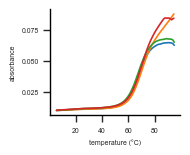

In [5]:
fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
for _,row in df_2a.iterrows():
    curve = read_curve(get_blanked_fn(row['data_file']))
    # curve_predict = curve_model(curve.celsius, **{x:row[x] for x in ['dH','Tm','fmax','fmin','s1', 's2']})
    ax.plot(curve.celsius, curve.absorbance)
    
ax.xaxis.set_major_locator(MultipleLocator(20))


ax.set_yticklabels(ax.get_yticklabels(), fontsize=tick_font_size)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=tick_font_size)

ax.set_xlabel('temperature (°C)', fontsize=tick_font_size)
ax.set_ylabel('absorbance', fontsize=tick_font_size)

sns.despine()
util.save_fig('./fig/Fig2/Fig2a/UV_melting_example_all_curves_WC2318.pdf')

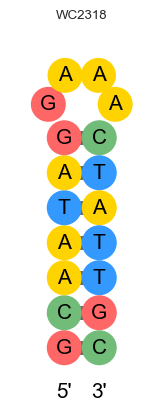

In [6]:
plotting.draw_target_struct('WC2318', arr)
util.save_fig('./fig/Fig2/UV_melting_example_curve_WC2318_struct.pdf')

# Fig. 2d: Direct comparison

In [7]:
def to_rgb(x):
    return np.array(x) / 256.

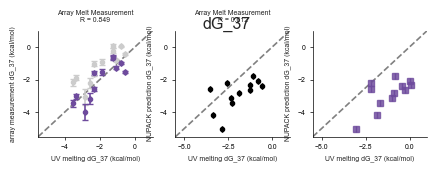

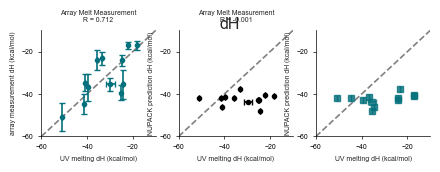

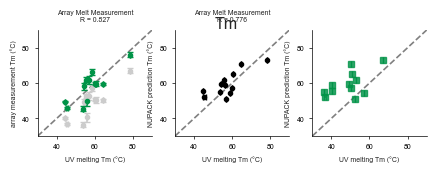

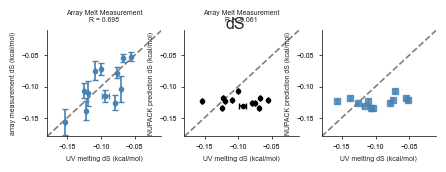

In [104]:
# for export
series = 'All'
plot_query = 'n_curve > 0'
df_q = vf.dropna(subset=['Tm', 'dG_37'])#.query(plot_query)
df_q.dG_37_uv_std = 0

dTm = np.median(df_q.Tm_uv - df_q.Tm)
df_q['Tm_adj'] = df_q.Tm + dTm
df_q['dG_37_adj'] = util.get_dG(dH=df_q.dH, Tm=df_q.Tm_adj, celsius=37)
df_q['dH_adj'] = df_q.dH

def mae_norm(x, xerr, y):
    epsilon = 1e-2
    aerr = np.abs(x - y)
    return np.mean(aerr / (xerr + epsilon))

def plot_uv_comparison(df_q, param, lim, array_suffix='', plot_adj=False):
    unit_dict = dict(dH='kcal/mol', dS='kcal/mol', dG_37='kcal/mol', Tm='°C')
    color_dict = dict(dH=to_rgb([5,113,124]), Tm=to_rgb([0,148,71]), dG_37=to_rgb([110,75,158]), dS='steelblue')
    param_name_dict = dict(dH=r'$dH°$', dS=r'$dS°$', dG_37=r'$dG°_{37}$', Tm=r'$T_m$')
    unit = unit_dict[param]
    param_name = param_name_dict[param]
    
    kwargs = dict(fmt = '.', alpha=1, marker='o', markersize=3, capsize=2)
    
    fig, ax = plt.subplots(1, 3, figsize=(3*4.25*cm, 3.5*cm))
    for a in ax:
        a.tick_params(colors='k', width=.5)
        
    x = df_q[param + '_uv']
    y = df_q[param+array_suffix]
    
    xerr = df_q[param+'_uv_std'].values
    ax[0].plot(lim, lim, '--', c='gray')
    
    if plot_adj:
        y_adj = df_q[param+'_adj']
        ax[0].errorbar(x, y,
                       xerr=xerr, yerr=df_q[param+'_se'],
                       color=[.8]*3, **kwargs)
        ax[0].errorbar(x, y_adj,
                   xerr=xerr, yerr=df_q[param+'_se'],
                   color=color_dict[param], **kwargs)
    else:
        ax[0].errorbar(x, y,
                   xerr=xerr, yerr=df_q[param+'_se'],
                   color=color_dict[param], **kwargs)
        
    ax[0].set_xlim(lim)
    ax[0].set_ylim(lim)
    ax[0].set_xlabel(f'UV melting {param} ({unit})', fontsize=tick_font_size)
    ax[0].set_ylabel(f'array measurement {param} ({unit})', fontsize=tick_font_size)
    ax[0].set_title('Array Melt Measurement\nR = %.3f' %
                    (pearsonr(x, y)[0]), fontsize=tick_font_size)
    
    if param == 'dG_37':
        ax[0].xaxis.set_major_locator(MultipleLocator(2))
        ax[0].yaxis.set_major_locator(MultipleLocator(2))
    
    x = df_q[param+'_uv'].values
    y = df_q[param+'_NUPACK_salt_corrected'].values
    ax[1].errorbar(x, y,
                   xerr=df_q[param+'_uv_std'],
                   color='k', **kwargs)
    ax[1].plot(lim, lim, '--', c='gray')
    ax[1].set_xlim(lim)
    ax[1].set_ylim(lim)
    ax[1].set_xlabel(f'UV melting {param} ({unit})', fontsize=tick_font_size)
    ax[1].set_ylabel(f'NUPACK prediction {param} ({unit})', fontsize=tick_font_size)
    ax[1].set_title('Array Melt Measurement\nR = %.3f' %
                    (pearsonr(x, y)[0]), fontsize=tick_font_size)
    x = df_q[param+array_suffix].values
    y = df_q[param+'_NUPACK_salt_corrected'].values
    kwargs['marker'] = 's'
    kwargs['markersize'] = 5
    kwargs['alpha'] = 0.8
    ax[2].errorbar(x, y,
               xerr=df_q[param+'_uv_std'],
               color=color_dict[param], **kwargs)
    ax[2].plot(lim, lim, '--', c='gray')
    ax[2].set_xlim(lim)
    ax[2].set_ylim(lim)
    ax[2].set_xlabel(f'UV melting {param} ({unit})', fontsize=tick_font_size)
    ax[2].set_ylabel(f'NUPACK prediction {param} ({unit})', fontsize=tick_font_size)
    # ax[2].set_title('Array Melt vs NUPACK prediction\ncorr = %.4f, MAE = %.4f' %
    #                 (pearsonr(x, y)[0], mae(x, y)))
    for i in range(3):
        ax[i].set_yticklabels(ax[i].get_yticklabels(), fontsize=tick_font_size)
        ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=tick_font_size)

    plt.suptitle(param)
    sns.despine()
    util.beutify_all_ax(ax)
    # plt.show()
    
plot_uv_comparison(df_q, 'dG_37', lim = (-5.5, 1), plot_adj=True)
util.save_fig(f'./fig/Fig2/Fig2b/{series}_dG_37.pdf')
plot_uv_comparison(df_q, 'dH', lim = (-60, -10))
util.save_fig(f'./fig/Fig2/Fig2b/{series}_dH.pdf')
plot_uv_comparison(df_q, 'Tm', lim = (30, 90), plot_adj=True)
util.save_fig(f'./fig/Fig2/Fig2b/{series}_Tm.pdf')
plot_uv_comparison(df_q, 'dS', lim = (-.18, -.01))
util.save_fig(f'./fig/Fig2/Fig2b/{series}_dS.pdf')

In [106]:
df_q.columns

Index(['SEQID', 'curve_date', 'curve_num', 'dH_uv', 'dH_uv_std', 'n_curve',
       'Tm_uv', 'Tm_uv_std', 'dG_37_uv', 'dG_37_uv_std', 'dS_uv', 'dS_uv_std',
       'is_hairpin', 'Na_mM', 'conc_uM', 'Purification', 'dH', 'dH_se',
       'dH_lb', 'dH_ub', 'Tm', 'Tm_se', 'Tm_lb', 'Tm_ub', 'dG_37', 'dG_37_se',
       'dG_37_lb', 'dG_37_ub', 'dS', 'dS_se', 'dS_lb', 'dS_ub', 'fmax',
       'fmax_se', 'fmax_lb', 'fmax_ub', 'fmin', 'fmin_se', 'fmin_lb',
       'fmin_ub', 'Series', 'ConstructType', 'bottomScaffold', 'topScaffold',
       'RefSeq', 'dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK',
       'dG_37_ensemble_NUPACK', 'TargetStruct', 'dG_37_NUPACK',
       'dG_37_ensemble_150mM_NUPACK', 'dG_37_ensemble_75mM_NUPACK', 'GC',
       'Tm_NUPACK_salt_corrected', 'dG_37_NUPACK_salt_corrected',
       'dH_NUPACK_salt_corrected', 'dS_NUPACK_salt_corrected', 'Tm_adj',
       'dG_37_adj', 'dH_adj'],
      dtype='object')

In [105]:
x = df_q.dG_37_uv
y = df_q.dG_37_adj
r2_score(x, y), pearson_r(x, y)

(0.6199115983364181, 0.8475923331988275)

In [10]:
agg_result_file='./data/uv_melt/uvmelt_agg_230502.csv'
uv_df = pd.read_csv(agg_result_file, index_col=1)
arr_adjusted = pd.read_csv('./data/models/processed/arr_v1_adjusted_n=27732.csv', index_col=0)

In [11]:
from nnn import train_nn as tnn

mydata = tnn.MyData()
mydata.load_everything()

In [12]:
vf = result_agg_df.query('is_hairpin & Na_mM == 25').sort_values(by=['conc_uM', 'n_curve', 'curve_date']).drop_duplicates(keep='last').merge(arr_adjusted, how='left', on='SEQID')
df_q = vf.dropna(subset=['Tm', 'dG_37'])

df_q['Tm_adj'] = df_q.Tm + dTm
df_q['dG_37_adj'] = util.get_dG(dH=df_q.dH, Tm=df_q.Tm_adj, celsius=37)
df_q['dH_adj'] = df_q.dH

In [14]:
pnames = ['dG_37', 'dH', 'Tm']
df_q = df_q.set_index('SEQID').join(mydata.arr[[p+'_NUPACK_salt_corrected' for p in pnames]])

In [15]:
mae = [util.mae(df_q[p+'_uv'], df_q[p]) for p in pnames]
mae_adj = [util.mae(df_q[p+'_uv'], df_q[p+'_adj']) for p in pnames]
corr = [util.pearson_r(df_q[p+'_uv'], df_q[p]) for p in pnames]
corr_nupack = [util.pearson_r(df_q[p+'_uv'], df_q[p+'_NUPACK_salt_corrected']) for p in pnames]

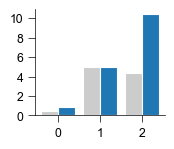

In [16]:
offset=.2
matplotlib.rc('axes',edgecolor='k', linewidth=.5)
fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
plt.bar(np.arange(3) - offset, mae, width = 0.4, color=[.8]*3)
plt.bar(np.arange(3) + offset, mae_adj, width = 0.4)
ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.tick_params(colors='k', width=.5)

sns.despine()
util.save_fig('./fig/Fig2/MAE_UV.pdf')

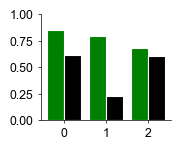

In [17]:
offset=.2
matplotlib.rc('axes',edgecolor='k', linewidth=.5)
fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
plt.bar(np.arange(3) - offset, corr, width = 0.4, color='g')
plt.bar(np.arange(3) + offset, corr_nupack, width = 0.4, color='k')
ax.set_ylim([0,1])
ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(.25))

ax.tick_params(colors='k', width=.5)

util.beutify(ax)
util.save_fig('./fig/Fig2/R_UV.pdf')

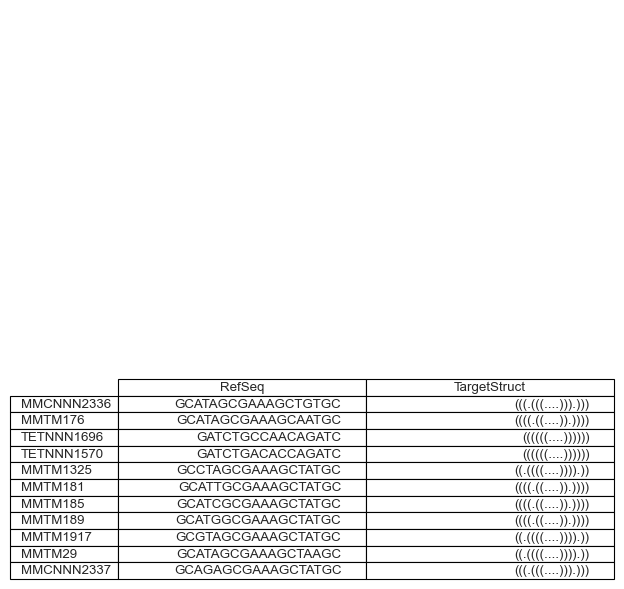

In [18]:
fig, ax = plt.subplots()
ax.axis('off')
pd.plotting.table(
    data=df_q[['RefSeq', 'TargetStruct']],
    ax=ax
)
util.save_fig('./fig/Fig2/UV_oligos.pdf')
df_q[['RefSeq', 'TargetStruct', 'dG_37_uv', 'dH_uv', 'Tm_uv']].to_csv('./fig/Fig2/UV_oligos.csv')

# Fig. S2b: WC68 over concentration range

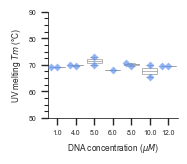

In [26]:
result_df = pd.read_csv('./data/uv_melt/uvmelt_230502_2.csv', index_col=0).query('pass_qc')

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
df = result_df.query('SEQID == "WC68" & (curve_name == "CoolingCurve" | curve_name == "SecondaryCoolingCurve")')
sns.swarmplot(data=df, y='Tm', x='conc_uM', #hue='curve_name', 
              color='cornflowerblue', alpha=.7, marker='D', size=4, ax=ax)
# ax.get_legend().remove()
sns.boxplot(data=df, y='Tm', x='conc_uM', color='white', linewidth=.5, ax=ax)

ax.set_xlabel('DNA concentration ($\mu M$)', fontsize=label_font_size)
ax.set_ylabel('UV melting $Tm$ (°C)', fontsize=label_font_size)
plt.ylim([50,90])
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=tick_font_size)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(axis='both', which='major', labelsize=tick_font_size)

sns.despine()
util.save_fig('./fig/Fig2/FigS2b_WC68_conc.pdf')

# Fig. S4d NN model comparison

In [27]:
ecl_oligo_df = pd.read_csv('./data/uv_melt/ECLTables/ECLOligos230502.csv').set_index('OligoID')['sequence']

In [28]:
hp_df = result_agg_df[result_agg_df.SEQID.apply(lambda x: x.startswith('HP'))]
hp_df = hp_df.rename(columns=lambda x: x.replace('_uv', ''))
hp_df = hp_df.set_index('SEQID').join(ecl_oligo_df).rename(columns={'sequence': 'RefSeq'})
hp_df['TargetStruct'] = '((((((....))))))'

In [29]:
val_result_df_dna04 = modeling.make_model_validation_df(hp_df, 
                                  model='nupack', model_param_file='./models/dna04.json',)
val_result_df_small = modeling.make_model_validation_df(hp_df, 
                                  model='nupack', model_param_file='./models/hyb-adj-ext.json',)
lr_dict = fileio.read_pickle('./models/lr_dict.pkl')
val_result_df_mid = modeling.make_model_validation_df(hp_df, 
                                  model='linear_regression', 
                                  model_kwargs=dict(lr_dict=lr_dict, feature_method='get_feature_list'),)

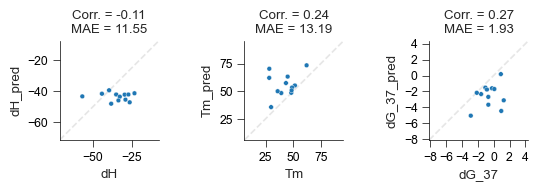

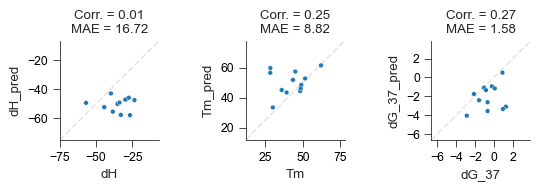

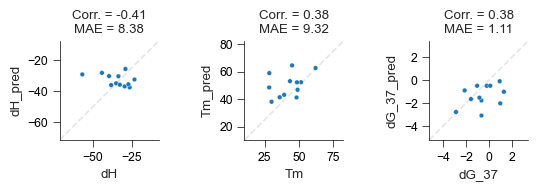

In [30]:
val_result_dict = dict(
    dna04=val_result_df_dna04,
    small=val_result_df_small,
    mid=val_result_df_mid
)
metric_dict = dict()

for key,value in val_result_dict.items():
    metric_dict[key] = modeling.get_metric_dict(value, 'dG_37')
    modeling.plot_validation_result_all_params(value)

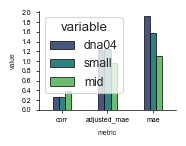

In [31]:
fig, ax = plt.subplots(figsize=(6,3))
modeling.plot_metric_bar(metric_dict, metric_name_list=['corr', 'adjusted_mae', 'mae'], ax=ax)
util.beutify(ax, shrink=True)
util.save_fig('./fig/Fig4/uv_melt/bar_plot_HP000.pdf')

In [32]:
hp_df.to_csv('./data/uv_melt/SuppFig4_HP.csv')

# Supp: ECL Object supp table

In [19]:
with open('./data/uv_melt/ECLTables/ECLDataObjects.csv', 'r') as fh:
    data_obj = fh.readlines()
    
with open('./data/uv_melt/ECLTables/ECLDataObjectProtocols.csv', 'r') as fh:
    protocol_obj = fh.readlines()

data_obj = [x.strip()[5:-30].replace('""', '"') for x in data_obj]
protocol_obj = [x.strip()[1:-1].replace('""', '"') for x in protocol_obj]

sample_sheet = pd.read_csv(sample_sheet_file)

sample_sheet = sample_sheet[['SEQID', 'Na_mM', 'ProtocolID (from curve_date)', 'curve_num']].rename(columns={'ProtocolID (from curve_date)' : 'ProtocolID'})

df = pd.DataFrame(dict(
    DataID = data_obj,
    ProtocolID = protocol_obj
))

df['curve_num'] = 0

cnum = 1
for i,row in df.iterrows():
    if i+1 < len(df):
        df.loc[i, 'curve_num'] = cnum
        if df.loc[i, 'ProtocolID'] == df.loc[i+1, 'ProtocolID']:
            cnum += 1
        else:
            cnum = 1
        
df.loc[len(df)-1, 'curve_num'] = cnum
# df.to_csv('./data/uv_melt/ECLTables/ECLDataObjectSupp.csv')

df = pd.merge(df, sample_sheet,
                how='left', 
                left_on=['ProtocolID', 'curve_num'], right_on=['ProtocolID', 'curve_num']
             ).drop(columns=['Na_mM']).query('SEQID != "blank"')

In [20]:
df.to_csv('./data/uv_melt/ECLTables/ECLDataObjectSupp.csv')

In [21]:
df.query('SEQID != "blank"').SEQID[20:40]

23    TETNNN2253
24    TETNNN1781
25    TETNNN2108
26    TETNNN1696
28    TETNNN2082
29    TETNNN3186
30    TETNNN2099
31    TETNNN1570
32           BC0
33      TETNN903
35           BC0
36           BC1
37           BC6
38           BC7
39           BC8
40           BC9
42         HP001
43         HP002
44         HP003
45         HP004
Name: SEQID, dtype: object

In [22]:
fig2_oligos = pd.read_csv('./fig/Fig2/UV_oligos.csv', index_col=0).reset_index()

In [23]:
df[df.SEQID.apply(lambda x: x in fig2_oligos.SEQID.values)].to_csv('./data/uv_melt/ECLTables/ECLDataObjectSupp.csv')

In [24]:
set(fig2_oligos.SEQID.values) - set(np.unique(df[df.SEQID.apply(lambda x: x in fig2_oligos.SEQID.values)].SEQID))

{'MMTM176'}

In [25]:
df.merge(df_q.reset_index()[['SEQID', 'RefSeq', 'TargetStruct']], on='SEQID').set_index('SEQID').to_csv('./data/uv_melt/ECLTables/ECLDataObjectSupp.csv')